<a href="https://colab.research.google.com/github/ander002/DeepLearning/blob/main/train_set/cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l
from torch.autograd import Variable
from matplotlib import pyplot as plt

In [ ]:
train_data = torchvision.datasets.CIFAR10(
    root='CIFAR10',
    train = True,
    transform=torchvision.transforms.ToTensor(),
    download=False
)
test_data = torchvision.datasets.CIFAR10(
    root='CIFAR10',
    train = False,
    transform=torchvision.transforms.ToTensor(),
    download=False
)

In [ ]:
train_iter = torch.utils.data.DataLoader(train_data,batch_size=50,shuffle=True)
test_iter = torch.utils.data.DataLoader(test_data,batch_size=50,shuffle=True)
images,labels = next(iter(train_iter))

In [ ]:
def get_titles(labels):
    text_title = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    return [text_title[int(i)] for i in labels]

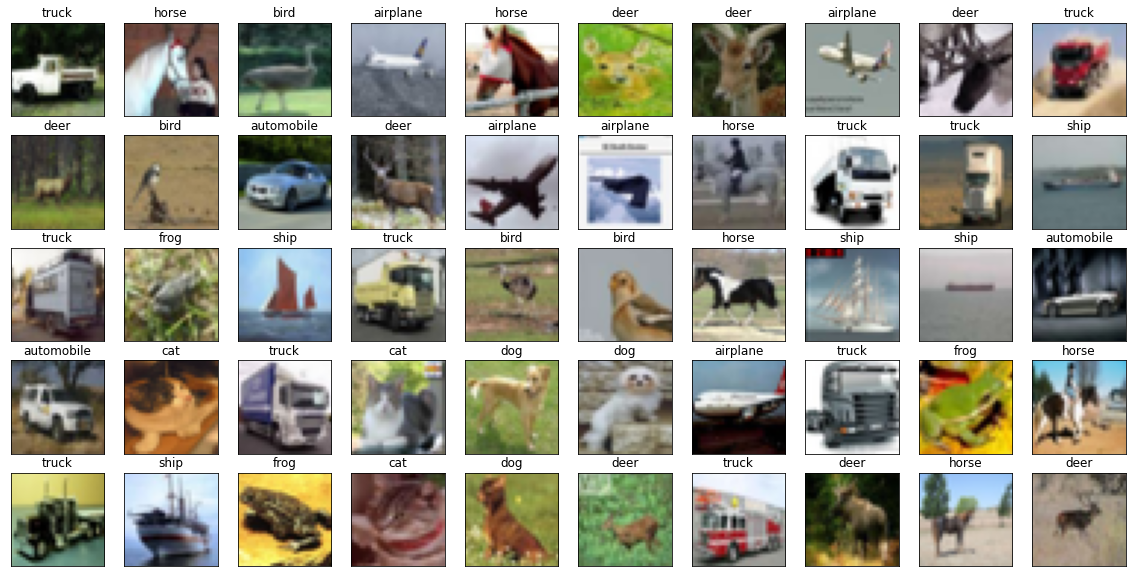

In [ ]:
img = images.permute(0,2,3,1)
d2l.show_images(img,5,10,titles=get_titles(labels),scale=2);

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Sequential(
                    nn.Conv2d(3,64,kernel_size=1),
                    nn.BatchNorm2d(64),
                    nn.ReLU(),
                    nn.Conv2d(64,128,kernel_size=(3,1),padding=(1,1)),
                    nn.Conv2d(128,128,kernel_size=(1,3),padding=(1,1)),
                    nn.MaxPool2d(2,2),
                    nn.BatchNorm2d(128),
                    nn.ReLU(),
                    nn.Conv2d(128,256,kernel_size=3,padding=1),
                    nn.MaxPool2d(2,2),
                    nn.BatchNorm2d(256),
                    nn.ReLU(),
                    nn.MaxPool2d(2,2))
        self.fc = nn.Sequential(
                nn.Linear(4*4*256,1024),
                nn.ReLU(),
                nn.Dropout(p=0.2),
                nn.Linear(1024,10))
    def forward(self,X):
        X = self.conv1(X)
        X = X.reshape(-1,4*4*256)
        X = self.fc(X)
        return X

In [ ]:
device = torch.device('cuda')
net = Net().to(device)
cost = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(),weight_decay=1e-3,lr=0.015)

In [ ]:

epochs = 15
for epoch in range(epochs):
    sum_loss = 0.0
    train_correct = 0
    for data in train_iter:
        inputs, labels = data
        inputs, labels = Variable(inputs).cuda(),Variable(labels).cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = cost(outputs,labels)
        loss.backward()
        optimizer.step()
        
        _, id = torch.max(outputs.data,1)
        sum_loss += loss.data
        train_correct += torch.sum(id == labels.data)
    print('[%d,%d] loss:%.3f' % (epoch+1,epochs,sum_loss/len(train_iter)))
    print('        correct:%.3f%%' % (100*train_correct/len(train_data)))

[1,15] loss:1.299
        correct:53.310%
[2,15] loss:0.918
        correct:67.572%
[3,15] loss:0.755
        correct:73.738%
[4,15] loss:0.639
        correct:77.730%
[5,15] loss:0.546
        correct:80.992%
[6,15] loss:0.471
        correct:83.850%
[7,15] loss:0.405
        correct:86.106%
[8,15] loss:0.347
        correct:88.318%
[9,15] loss:0.292
        correct:90.284%
[10,15] loss:0.242
        correct:92.060%
[11,15] loss:0.204
        correct:93.352%
[12,15] loss:0.170
        correct:94.714%
[13,15] loss:0.139
        correct:95.926%
[14,15] loss:0.112
        correct:96.850%
[15,15] loss:0.098
        correct:97.384%


In [ ]:
net.eval()
test_correct = 0
for data in test_iter:
    inputs,labels = data
    inputs,labels = Variable(inputs).cuda(),Variable(labels).cuda()
    outputs = net(inputs)
    _, id = torch.max(outputs.data,1)
    test_correct += torch.sum(id == labels.data)
print('correct:%.3f%%'%(100*test_correct/len(test_data)))

correct:80.410%


In [ ]:
torch.optim.SGD?